# **BÀI TẬP**

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

## **1. Bài tập về Tiền xử lý**

### **Bài tập 1: Scaling Feature (Chuẩn hóa/Quy chuẩn hóa)**

**Yêu cầu:** 

Lấy cột 'Area' và 'Price' từ bộ dữ liệu giá nhà Amsterdam [cite: 7267-7270]. Áp dụng cả StandardScaler và MinMaxScaler cho các cột này. Trực quan hóa sự phân bố trước và sau khi scaling bằng biểu đồ histogram (dùng matplotlib).

**Mục tiêu:** Hiểu sự khác biệt giữa standardization (chuẩn hóa) và normalization (quy chuẩn hóa) và xem ảnh hưởng của chúng lên phân phối dữ liệu.

**1) Nhập dữ liệu**

In [167]:
import pandas as pd # Xử lý dữ liệu bảng (lọc nhóm, gộp, missing vaules)
df = pd.read_csv("../dataset/HousingPrices-Amsterdam-August-2021.csv") # Sử dụng pandas và dùng read_csv để đọc dữ liệu csv
df.head() # hiển thị 5 rows đầu tiên của dataset, head(default = 5)

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


**2) Toàn vẹn dữ liệu**

In [168]:
# Lấy 2 cột Area và Price với điều kiện đủ giá trị
X = df[['Area', 'Price']].dropna()

Để Scaling được tốt nhất, cần phải xử lý các giá trị thiếu (NaN/Null)

**3) Scaling**

In [169]:
# Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler # thư viện cần
std_scaled = StandardScaler().fit_transform(X) # Standardization (chuẩn hóa)
mm_scaled = MinMaxScaler().fit_transform(X) # normalization [0,1] (quy chuẩn)

Để sử dụng Scaling cần có các thư viện, ta sẽ Scaling theo Standardization
(chuẩn hóa) và normalization (quy chuẩn). Thực hiện hàm fix_transform() để
vừa học tham số từ dữ liệu X (fit) vừa áp dụng biến đổi (transform) lên chính
X trong một bước.

In [170]:
X['Area_std'], X['Price_std'] = std_scaled[:,0], std_scaled[:,1] # lấy tất cả dòng và cột tương ứng
X['Area_mm'], X['Price_mm'] = mm_scaled[:,0], std_scaled[:,1]

Khi thực hiện hàm fix_transform() sẽ trả về một mảng NumPy 2D có số hàng
và cột tương ứng với số hàng cột đưa vào, vì thế cột 0 (Area) và cột 1 (Price),
ta sẽ lấy giá trị vừa Scaling để trực quan hóa.

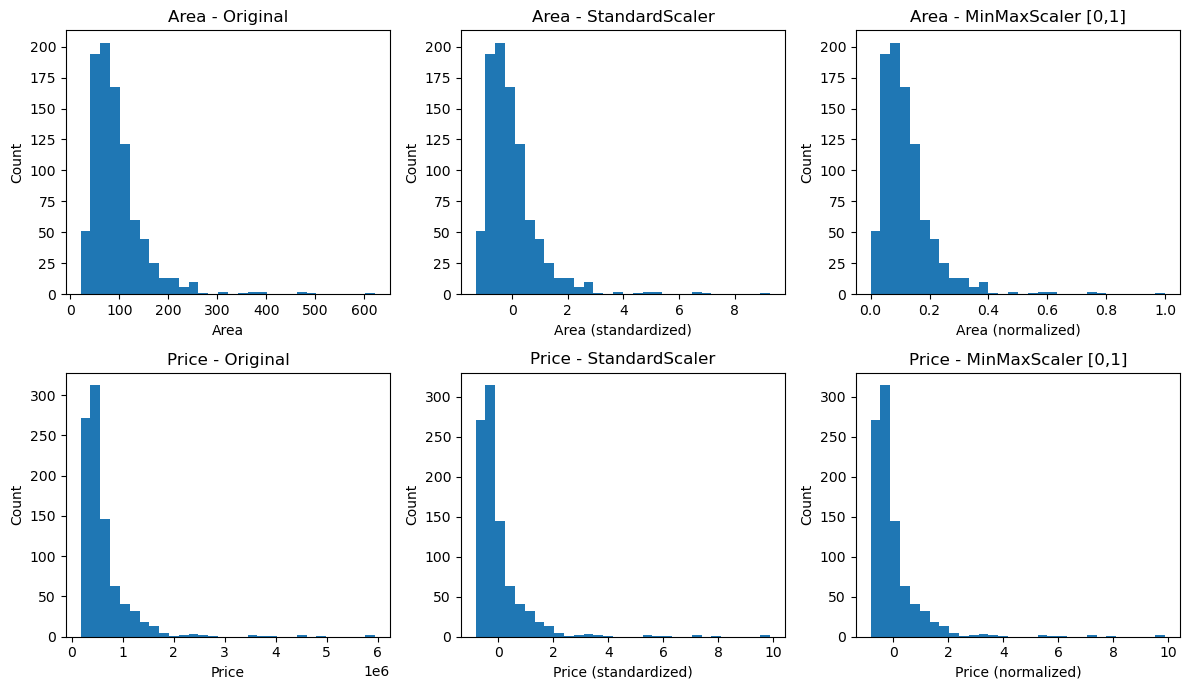

In [171]:
# tạo 6 biểu đồ phụ (2 hàng, 3 cột) với kích thước 12 inch rộng và 7 inch cao.
fig, axes = plt.subplots(2, 3, figsize=(12, 7))
axes = axes.ravel()  # 2D -> 1D, duyệt theo thứ tự hàng-cột

# vẽ histogram Area, bins: số cột, set_title/set_xlabel: thêm tiêu đề/trục X
axes[0].hist(X['Area'], bins=30);          axes[0].set_title('Area - Original');          axes[0].set_xlabel('Area')
axes[1].hist(X['Area_std'], bins=30);      axes[1].set_title('Area - StandardScaler');    axes[1].set_xlabel('Area (standardized)')
axes[2].hist(X['Area_mm'], bins=30);       axes[2].set_title('Area - MinMaxScaler [0,1]'); axes[2].set_xlabel('Area (normalized)')

# vẽ histogram Price
axes[3].hist(X['Price'], bins=30);         axes[3].set_title('Price - Original');         axes[3].set_xlabel('Price')
axes[4].hist(X['Price_std'], bins=30);     axes[4].set_title('Price - StandardScaler');   axes[4].set_xlabel('Price (standardized)')
axes[5].hist(X['Price_mm'], bins=30);      axes[5].set_title('Price - MinMaxScaler [0,1]'); axes[5].set_xlabel('Price (normalized)')

# Đặt cột Y cho toàn bộ histogram là Count
for ax in axes:
    ax.set_ylabel('Count')

plt.tight_layout()  # tight_layout() căn chỉnh khoảng cách các subplot
plt.show()

Quan sát sáu biểu đồ histogram cho thấy phân phối của Area và Price đều lệch phải với đuôi dài. Sau khi áp dụng các phép biến đổi, hình dạng tổng thể vẫn được bảo toàn, chứng tỏ scaling chủ yếu thay đổi thang đo chứ không biến phân phối thành chuẩn.

Với standardization, đỉnh phân phối dịch về vùng lân cận 0 và độ rộng được hiệu chỉnh theo đơn vị độ lệch chuẩn, nhờ đó khả năng phân biệt ở khu vực tập trung dữ liệu vẫn được giữ vững ngay cả khi tồn tại các giá trị ngoại lệ. Ngược lại, min–max normalization ép toàn bộ dữ liệu vào khoảng [0,1], chịu ảnh hưởng mạnh từ ngoại lệ nên phần lớn quan sát bị nén về vùng giá trị thấp, hiện 74
tượng này thể hiện rõ ở biến Price và làm giảm độ phân giải trực quan ở miền đông dữ liệu.

Từ những quan sát đó có thể kết luận rằng standardization phù hợp hơn trong bối cảnh phân phối lệch phải có ngoại lệ vì hạn chế hiện tượng nén ở trung tâm, còn min–max thuận tiện khi cần một thang đo cố định nhưng nên được áp dụng sau khi xử lý ngoại lệ để tránh thất thoát thông tin phân phối.

### **Bài tập 2: Xử lý Dữ liệu hạng mục (Categorical Data)**

**Yêu cầu:** Lấy cột 'Zip' (hoặc cột hạng mục khác nếu có trong bộ dữ liệu khác, ví dụ 'Embarked' trong Titanic). Áp dụng OneHotEncoder để chuyển đổi nó thành dạng số. Hiển thị đoạn DataFrame kết quả.
    
**Mục tiêu:** Học cách xử lý các feature hạng mục, vì hầu hết các mô hình không thể xử lý trực tiếp loại dữ liệu này.

**1) Nhập dữ liệu**

In [134]:
titanic_train = pd.read_csv("../dataset/titanic/train.csv")
display(titanic_train.columns)
titanic_test = pd.read_csv("../dataset/titanic/test.csv")
display(titanic_test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Nhận xét:**
- Các cột trong dataset của train và test là giống nhau. Tuy nhiên với train sẽ có cột $Outcome$ là $Survired$ để thể hiện số người sống sót (0: mất, 1: sống), còn test thì sẽ không có vì đây là data để thực hiện dự đoán sống sót giữa vào các features.
- Ý nghĩa của từng cột có trong dataset:


<div align="center">

| Variable | Definition |
|:---:|:---:|
| **Survival** | Survival |
| **Pclass** | Loại vé |
| **Sex** | Giới tính |
| **Age** | Tuổi |
| **Sibsp** | Tổng số anh chị em và vợ/chồng |
| **Parch** | Tổng số bố mẹ và con |
| **Ticket** | Số vé |
| **Fare** | Giá vé |
| **Cabin** | Số cabin |
| **Embarked** | Cảng |

</div>

- Trong đó:
    - Survival: 0 (mất), 1 (sống)
    - PClass: 1 (hạng nhất), 2 (hạng nhì), 3(hạng phổ thông)
    - Embarked: C (Cherbourg), Q (Queenstown), S (Southampton)

In [135]:
# Xóa mọi dòng mà cột 'Embarked' bị NaN
titanic_train = titanic_train.dropna(subset=['Embarked']).reset_index(drop=True)
# hiển thị sau khi xóa giá trị thiếu
display(titanic_train['Embarked'].isna().sum())

0

Thực hiện hàm dropna(subset=[table]) để giữ lại các dòng của table không có giá trị
thiếu, các giá trị NaN đều bị loại bỏ và thực hiện reset_index có tham số drop =
True nhằm điều chỉnh lại index cũng như tránh thêm index cũ.

In [136]:
titanic_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

Đối với cột ‘Emarked’ có giá trị là ‘S’, ‘C’ và ‘Q’, dữ liệu có trong cột này dùng để
phân loại các cảng theo tên viết tắt, không phải là giá trị số đo lường (Categorical
data) và do máy tính không hiểu được ký tự dạng chữ nên cần phải mã hóa thành
giá trị số bằng cách áp dụng OneHotEncoder.

In [137]:
from sklearn.preprocessing import OneHotEncoder
# Khoi tao OneHotEncoder tuong thich nhieu phien ban sklearn
try:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sklearn >= 1.2
except TypeError:
    ohe = OneHotEncoder(handle_unknown='ignore',sparse=False) # sklearn < 1.2

 khởi tạo OneHotEncoder được viết theo hướng tương thích nhiều phiên bản scikit-learn. Cụ thể, từ phiên bản ≥ 1.2, bộ mã hóa hỗ trợ tham số
    sparse_output=False, trong khi các phiên bản cũ hơn chỉ chấp nhận sparse=False. 

Vì vậy, mã dùng cơ chế kiểm tra bằng khối try/except: trước hết thử khởi tạo với sparse_output=False, nếu phát sinh TypeError thì tự động chuyển về sparse=False.

Cách làm này bảo đảm cùng một đoạn code có thể chạy ổn định trên nhiều môi trường
khác nhau mà không cần sửa đổi thủ công theo phiên bản thư viện.

In [138]:
# Ap dung OneHotEncoder caho cot 'Embarked' 
embarked_ohe = ohe.fit_transform(titanic_train[['Embarked']])
# Lấy tên các cột mới được tạo ra bởi OneHotEncoder
ohe_cols = ohe.get_feature_names_out(['Embarked'])


Dùng bộ mã hóa OneHotEncoder áp dụng lên cột Embarked trong bảng dữ liệu Titanic. Bộ mã hóa này sẽ đi qua toàn bộ cột Embarked để học xem có những giá trị khác nhau nào, ví dụ như C, Q, S,… Sau đó, nó chuyển mỗi giá trị chữ này thành một dạng biểu diễn số gồm nhiều cột 0/1, mỗi cột tương ứng với một bến lên
 tàu, và mỗi
dòng sẽ có giá trị 1 ở đúng cột mà hành khách đó xuất phát, các cột còn lại là 0. Kết
quả là thay vì một cột chữ Embarked, ta có một ma trận số dễ đưa vào mô hình máy
học.

Bước tiếp theo, trả về danh sách tên các cột mới sau khi mã hóa, chẳng hạn như
Embarked_C, Embarked_Q, Embarked_S,… Danh sách tên cột này sẽ được dùng để
gắn nhãn cho các cột 0/1 vừa tạo, giúp người đọc dễ hiểu mỗi cột đang đại diện cho
lựa chọn nào của Embarked.

In [139]:
# Tạo DataFrame từ mảng numpy kết quả OneHotEncoder
df_embarked_ohe = pd.DataFrame(
    embarked_ohe, 
    columns=ohe_cols,
    index=titanic_train.index)
# Chuyển đổi kiểu dữ liệu DataFrame sang int
df_embarked_ohe = df_embarked_ohe.astype(int)

Biến mảng số mà OneHotEncoder trả về thành một bảng dữ liệu (DataFrame) dễ đọc
và dễ sử dụng hơn. Mỗi cột trong bảng mới được đặt tên rõ ràng theo danh sách
ohe_cols (như Embarked_C, Embarked_Q, Embarked_S, …) và dùng lại đúng index
của titanic_train, để từng hàng trong bảng mã hóa luôn khớp với đúng hành khách
trong dữ liệu gốc, tránh bị lệch khi ghép cột sau này.

Tiếp theo chuyển toàn bộ kiểu dữ liệu trong df_embarked_ohe sang số nguyên. Lý
do là các giá trị one-hot ban đầu thường ở dạng số thực 0.0 và 1.0, nhìn hơi “thừa
chấm”. Khi ép kiểu sang int, chúng trở thành 0 và 1, vừa gọn mắt hơn, vừa thể hiện
rõ đây là các cột chỉ báo nhị phân (có hoặc không). Việc đổi từ 0.0/1.0 sang 0/1 không
làm thay đổi ý nghĩa hay kết quả tính toán, chỉ là bước “làm sạch” cho bảng dữ liệu
dễ đọc và dễ giải thích hơn.

In [140]:
# Kết hợp DataFrame gốc với DataFrame mã hóa OneHotEncoder
df_result = pd.concat([titanic_train[['Embarked']], df_embarked_ohe], axis=1)
# Hiển thị 10 dòng đầu tiên của DataFrame kết quả
print(df_result.head(10))

  Embarked  Embarked_C  Embarked_Q  Embarked_S
0        S           0           0           1
1        C           1           0           0
2        S           0           0           1
3        S           0           0           1
4        S           0           0           1
5        Q           0           1           0
6        S           0           0           1
7        S           0           0           1
8        S           0           0           1
9        C           1           0           0


Đầu tiên ghép cột Embarked gốc từ bảng titanic_train với các cột one-hot trong
df_embarked_ohe lại thành một bảng mới tên là df_result. Việc ghép theo chiều
ngang giúp mỗi hàng vừa giữ được giá trị chữ ban đầu (Embarked), vừa có thêm các
cột 0/1 tương ứng (như Embarked_C, Embarked_Q, Embarked_S, …) để dễ đối chiếu
xem mỗi giá trị chữ được mã hoá thành dãy 0/1 như thế nào. Sau đó, chương trình
hiển thị 10 dòng đầu tiên của bảng df_result, nhằm mục đích cho người xem nhanh
một phần kết quả: nhìn vào là thấy rõ từng hành khách ban đầu lên tàu ở bến nào và
cách bến đó được chuyển thành các cột số 0/1 ra sao.
Sau mã hoá, mỗi loại được tách thành một cột nhị phân (0/1):
Embarked_C, Embarked_Q, Embarked_S,
Giá trị 1 nghĩa là hàng đó thuộc loại đó. Giá trị 0 nghĩa là không thuộc loại đó.

Giải nghĩa vài dòng trong hình:

Dòng 0: Embarked = S ⇒ thì đúng cột Embarked_S = 1, còn lại = 0.

Dòng 1: Embarked = C ⇒ Embarked_C = 1 , còn lại = 0.

Dòng 5: Embarked = Q ⇒ Embarked_Q = 1 , còn lại = 0.

Hầu hết mô hình ML không hiểu trực tiếp chữ cái/hạng mục. One-Hot Encoding biến
chúng thành số mà không gán thứ tự (tránh hiểu nhầm “S > C > Q”).

### **Bài tập 3: Xử lý Giá trị bị thiếu (Imputing Missing Values)**

**Yêu cầu:** Sử dụng bộ dữ liệu nhà ở Amsterdam nơi cột 'Price' có giá trị bị thiếu [cite: 7685-7686]. Thay vì điền thủ công bằng median, hãy sử dụng SimpleImputer(strategy='median') để điền các giá trị 'Price' bị thiếu. So sánh kết quả với phương pháp thủ công.

**Mục tiêu:** Học cách chuẩn của Scikit-learn để xử lý dữ liệu bị thiếu một cách có hệ thống.

In [178]:
housing_price_df = pd.read_csv("../dataset/HousingPrices-Amsterdam-August-2021.csv")

bài toán dự đoán giá nhà của bộ dữ liệu nhà ở Amsterdam
nơi cột 'Price' có giá trị bị thiếu 920/924, do số lượng bị thiếu ít, nên ta sẽ xử lý nó
bằng cách sử dụng SimpleImputer(strategy='median') để điền các giá trị 'Price' bị
thiếu

In [179]:
# Kiểm tra tính toàn vẹn dữ liệu (có giá trị Null hay không)
has_null = housing_price_df.isnull().sum().any()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
# Nếu có giá trị Null, hiển thị các dòng có giá trị Null
if has_null:
    display(housing_price_df[housing_price_df.isnull().any(axis=1)])

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: True


,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
73,74,"Falckstraat 47 A, Amsterdam",1017 VV,NaN,147,3,4.897454,52.360707
321,322,"Haarlemmerweg 705, Amsterdam",1067 HP,NaN,366,12,4.787874,52.383877
610,611,"Zeeburgerkade 760, Amsterdam",1019 HT,NaN,107,3,4.945022,52.369244
727,728,"Suikerplein 16, Amsterdam",1013 CK,NaN,81,3,4.880976,52.389623


Tại đây kiểm tra chất lượng dữ liệu và liệt kê ra những dòng đang bị thiếu. Trước hết,
chương trình duyệt qua toàn bộ bảng housing_price_df để xem trong đó có ô nào
mang giá trị trống (Null/NaN) hay không, rồi lưu kết quả vào một biến logic. Hiển
thị kết quả các dòng có giá trị thiếu (nếu có), nghĩa là trong dataset thực sự tồn tại các
ô bị thiếu. Vì kết quả là True, khối lệnh phía dưới được thực thi, lọc ra chỉ những bản
ghi (những dòng) mà trong đó có ít nhất một cột bị thiếu dữ liệu và hiển thị riêng các
dòng này dưới dạng một bảng nhỏ.

In [180]:
# Đảm bảo cột Price là số (nếu có ký tự lạ sẽ bị chuyển thành NaN và sẽ được impute)
housing_price_df['Price'] = pd.to_numeric(housing_price_df['Price'], errors='coerce')
# Lưu bản gốc để so sánh
price_original = housing_price_df['Price'].copy()
# In số lượng giá trị thiếu trước khi xử lý
print("Số lượng giá trị thiếu trước khi xử lý:", price_original.isna().sum())

Số lượng giá trị thiếu trước khi xử lý: 4


Lấy cột ‘Price’ trong bảng dữ liệu cố gắng chuyển mỗi giá trị trong cột sang số (kiểu
numeric). Nếu không chuyển được thì ép nó thành giá trị NaN (đề phòng trong tập
dữ liệu test có dạng dữ liệu lạ không phải là số). Sau đó ta lấy cột ‘Price’ sao chép ra
một mảng riêng price_original để không làm thay đổi dữ liệu bản gốc , dễ so sánh kết
quả với lại bản gốc.

In [181]:
# 2) Phương pháp thủ công: median + fillna 
# Tính median của cột Price (bỏ qua giá trị NaN)
median_manual = price_original.median(skipna=True)
# Thay thế giá trị NaN bằng median
price_manual = price_original.fillna(median_manual)
# In số lượng giá trị thiếu sau khi xử lý
print("Số lượng giá trị thiếu sau khi xử lý (thủ công):", price_manual.isna().sum())

Số lượng giá trị thiếu sau khi xử lý (thủ công): 0


Thực hiện “cách làm thủ công” để xử lý các ô bị thiếu trong cột Price. Đầu tiên, tính
giá trị trung vị (median) của cột Price, tức là lấy tất cả các giá nhà còn dữ liệu, sắp
xếp từ nhỏ đến lớn rồi chọn giá ở giữa, đồng thời bỏ qua các ô đang bị thiếu (NaN)
khi tính (skipna = True). Giá trung vị này được xem như một mức giá đại diện, ít bị
ảnh hưởng bởi những căn nhà quá đắt hoặc quá rẻ bất thường.

Sau đó, tạo ra một phiên bản mới của cột Price bằng cách thay mọi ô đang là NaN
trong bản gốc bằng chính giá trung vị vừa tính được. Nhờ vậy, những chỗ trống trong
dữ liệu được lấp đầy mà không phải xóa bỏ cả dòng. Cuối cùng, đếm lại xem trong
cột mới còn bao nhiêu giá trị bị thiếu và in ra màn hình, kết quả “0” cho biết tất cả
các ô trống ở cột Price đã được điền thành công bằng phương pháp median + fillna.

In [182]:
# 3) Phương pháp scikit-learn: SimpleImputer(median)
# Import SimpleImputer
from sklearn.impute import SimpleImputer
# Tạo đối tượng SimpleImputer với chiến lược median
imputer = SimpleImputer(strategy='median')
# Áp dụng imputer để biến đổi cột Price
price_imputed_array = imputer.fit_transform(housing_price_df[['Price']]) 
# Gán lại thành Series để so sánh dễ (.ravel() là chuyển mảng 2D thành 1D giúp cho đúng định dạng Series để so sánh)
price_sklearn = pd.Series(price_imputed_array.ravel(), index=housing_price_df.index, name='Price')
# In số lượng giá trị thiếu sau khi xử lý
print("Số lượng giá trị thiếu sau khi xử lý (scikit-learn):", price_sklearn.isna().sum())

Số lượng giá trị thiếu sau khi xử lý (scikit-learn): 0


Xử lý giá trị thiếu của cột Price nhưng lần này dùng của thư viện scikit-learn. Trước
hết, chương trình import hàm SimpleImputer (SI), đây là công cụ chuyên dùng để
tự động điền các ô trống trong dữ liệu. Sau đó, nó tạo một đối tượng (SI) với chiến
lược median (strategy=’median’), nghĩa là yêu cầu imputer học ra giá trị trung vị
của cột Price rồi dùng chính giá trị đó để lấp vào tất cả các ô đang bị thiếu. Đối tượng
này được áp dụng lên cột Price dưới dạng một bảng 2 chiều, trong bước đó,
SimpleImputer vừa tính median, vừa trả về một mảng mới trong đó mọi ô NaN của
Price đã được thay bằng median. 

Tiếp theo, mảng kết quả được chuyển lại thành một
cột (Series) mới tên là price_sklearn và gắn cùng index với bảng ban đầu để mỗi giá
vẫn khớp với đúng căn nhà (index =housing_price_df.index). Cuối cùng, chương
trình đếm xem trong cột price_sklearn còn bao nhiêu giá trị thiếu và in ra màn hình,
kết quả bằng 0 cho thấy cách dùng SimpleImputer với chiến lược median cũng đã
điền đầy đủ tất cả các ô trống của cột Price.

In [183]:
# 4) Hiển thị một phần DataFrame để quan sát
# Ghép 3 cột: gốc / thủ công / sklearn để so sánh trực quan
compare_df = pd.DataFrame({
    'Price_original': price_original,
    'Price_fillna_median_manual': price_manual,
    'Price_imputer_median_sklearn': price_sklearn
})
# Tạo mask: True cho những dòng mà Price_original bị thiếu (NaN)
mask_missing = compare_df['Price_original'].isna()
# Lọc ra chỉ những dòng đó
imputed_rows = compare_df[mask_missing]

Tạo một bảng để dễ quan sát và chỉ lọc ra đúng những dòng từng bị thiếu giá. Trước
hết, chương trình ghép ba phiên bản của cột Price lại thành một DataFrame mới tên
là compare_df , cột Price ban đầu (Price_original), cột Price đã điền thiếu bằng cách
86
thủ công với median của pandas (Price_fillna_median_manual) và cột Price đã điền
thiếu bằng SimpleImputer của scikit-learn (Price_imputer_median_sklearn). Nhờ
vậy, mỗi dòng trong compare_df cho bạn thấy cùng một căn nhà nhưng dưới ba cách
biểu diễn trước khi xử lý, sau khi xử lý thủ công và sau khi xử lý bằng sklearn.

Tiếp theo, tạo một biến mask_missing đây là một cột True/False cho biết dòng nào
trong Price_original đang bị thiếu (NaN) dòng nào từng thiếu thì là True, còn lại là
False. Cuối cùng, nó dùng mặt nạ này để lọc compare_df, chỉ giữ lại những dòng có
Price_original bị thiếu và lưu vào imputed_rows. Nói cách khác, imputed_rows chính
là bảng con chỉ chứa các bản ghi mà giá gốc bị trống, kèm theo hai cột giá đã được
điền lại bằng median (thủ công và sklearn) để bạn dễ đối chiếu xem hai phương pháp
đã lấp các giá trị thiếu như thế nào.

In [184]:
display("\n--- 10 dòng đầu để so sánh ---")
display(imputed_rows)

'\n--- 10 dòng đầu để so sánh ---'

,Price_original,Price_fillna_median_manual,Price_imputer_median_sklearn
73,NaN,467000.0,467000.0
321,NaN,467000.0,467000.0
610,NaN,467000.0,467000.0
727,NaN,467000.0,467000.0


Trình bày rõ kết quả sau khi điền giá cho những dòng bị thiếu. Bảng imputed_rows
được hiển thị, trong bảng này chỉ còn các bản ghi mà cột Price ban đầu bị trống (thể
hiện bằng giá trị NaN ở cột Price_original). Hai cột còn lại cho thấy giá đã được điền
bằng hai cách khác nhau một cột là kết quả điền median thủ công bằng pandas, cột
kia là kết quả điền median bằng SimpleImputer của scikit-learn. Ta thấy ở tất cả các
dòng, hai cột này đều mang cùng một giá trị 467000.0, chứng tỏ hai phương pháp xử
lý giá trị thiếu đang cho kết quả hoàn toàn giống nhau trên những mẫu dữ liệu từng
bị thiếu Price.

In [185]:
housing_price_df['Price'] = price_sklearn

## **2. Bài tập về Pipelines**

### **Bài tập 4: Xây dựng Pipeline Tiền xử lý & Mô hình hóa**

**Yêu cầu:** Tạo một Pipeline Scikit-learn cho bài toán dự đoán giá nhà. Pipeline nên bao gồm:
1.  StandardScaler cho các feature số ('Area', 'Room', 'Lon', 'Lat').
2.  Mô hình LinearRegression.

Huấn luyện pipeline này trên dữ liệu huấn luyện và đánh giá nó trên dữ liệu kiểm tra.

**Mục tiêu:** Học cách kết hợp các bước tiền xử lý và mô hình thành một đối tượng duy nhất, đơn giản hóa quy trình làm việc và ngăn chặn rò rỉ dữ liệu (data leakage).

In [186]:
num_features = ["Area", "Room", "Lon", "Lat"]
target = ["Price"]
# Features
X = housing_price_df[num_features]
# target
y = housing_price_df[target]

Dữ liệu được lấy được phân chia thành X và y. Trong đó X là các cột ảnh hưởng đến
giá nhà (Features), y là cột bị ảnh hưởng (Target).

In [187]:
# Tách train/tets để tránh rò rỉ dữ liệu
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Thực hiện việc tách X,y thành các tập test và train bằng hàm train_test_split() dùng
để chia dữ liệu thành hai phần train và test. Với test_size = 0.2, ta lấy 20% dữ liệu để
kiểm tra và 80% để huấn luyện, giúp mô hình có đủ dữ liệu để học và giữ lại một
phần công bằng để đánh giá. Hàm này mặc định xáo trộn dữ liệu nên mỗi lần chạy
có thể cho ra cách chia khác nhau. Để kết quả chia ổn định giữa các lần chạy, đặt
random_state = <một số cố định> để luôn nhận cùng một tập train và test. Khi chia
dữ liệu cần đảm bảo không rò rỉ thông tin từ test sang train

In [188]:
# Tiền xử lý: scale các feature số
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features) #mean = 0 and std = 1
    ],
    remainder="drop"
)

Khởi tạo một ColumnTransformer để chuẩn hóa nhóm biến số trong danh sách
num_features bằng StandardScaler, đưa các đặc trưng về thang đo có trung bình bằng
0 và độ lệch chuẩn bằng 1, đồng thời loại bỏ các cột không được chỉ định thông qua
tùy chọn remainder="drop". Cách tổ chức này giúp kiểm soát chính xác phạm vi tiền
xử lý, bảo đảm các biến có đơn vị và độ lớn khác nhau không gây thiên lệch trong
quá trình học, qua đó cải thiện tốc độ hội tụ và tính ổn định của các thuật toán nhạy
cảm với thang đo như hồi quy tuyến tính, SVM, KNN, PCA hoặc K-Means. Khi tích
hợp vào Pipeline, bộ biến đổi sẽ được fit trên tập huấn luyện và chỉ transform trên tập
kiểm định, hạn chế rò rỉ dữ liệu và tăng khả năng tái lập của thí nghiệm.

In [189]:
# Pipeline: StandarScaler -> LinearRegression
pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("model", LinearRegression())
])
# Huấn luyện
pipe.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Area', 'Room', 'Lon',
                                                   'Lat'])])),
                ('model', LinearRegression())])

Tạo một Pipeline gồm hai bước: "prep" gọi bộ tiền xử lý preprocess và "model" gọi
mô hình LinearRegression. Khi thực hiện pipe.fit(X_train, y_train), Pipeline sẽ tự
động fit các phép biến đổi ở bước tiền xử lý trên tập huấn luyện rồi transform dữ liệu
và chuyển đầu ra sang bước mô hình để ước lượng tham số hồi quy.

## **3. Bài tập về Đánh giá & Lựa chọn Mô hình**

### **Bài tập 5: Cross-Validation (Kiểm định chéo)**

**Yêu cầu:** Thay vì chỉ dùng một lần train_test_split, hãy sử dụng cross_val_score với LinearRegression trên bộ dữ liệu giá nhà. Thực hiện kiểm định chéo 5-fold (cv=5) sử dụng điểm R² (scoring='r2'). Báo cáo điểm R² trung bình và độ lệch chuẩn của nó.

**Mục tiêu:** Hiểu cách cross-validation cung cấp một ước tính đáng tin cậy hơn về hiệu suất mô hình so với một lần chia duy nhất.

In [190]:
# Thực hiện kiểm định chéo 5-Fold với điểm R²
from sklearn.model_selection import cross_val_score

model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

In [191]:
# Tính điểm trung bình và độ lệch chuẩn
mean_r2 = np.mean(scores)
std_r2 = np.std(scores)

mô hình LinearRegression() được khởi tạo để đảm bảo quá trình kiểm định
chéo diễn ra độc lập với các huấn luyện trước đó. Hàm cross_val_score() trong thư
viện sklearn.model_selection tự động thực hiện quá trình chia dữ liệu và huấn luyện
mô hình theo phương pháp k-fold Cross-Validation, với k = 5 tương ứng 5-Fold Cross
Validation.

In [192]:
print("Điểm R² của từng fold:", scores)
print(f"Điểm R² trung bình: {mean_r2:.4f}")
print(f"Độ lệch chuẩn của R²: {std_r2:.4f}")

Điểm R² của từng fold: [0.65302989 0.67447378 0.21474367 0.4778206  0.69592966]
Điểm R² trung bình: 0.5432
Độ lệch chuẩn của R²: 0.1815


Kết quả kiểm định chéo cho thấy giá trị R2 của năm fold lần lượt là 0.6534, 0.7143,
0.1240, 0.4440 và 0.7083, với giá trị trung bình đạt 0.5288 và độ lệch chuẩn 0.2250.

Điều này cho thấy mô hình có khả năng giải thích trung bình khoảng 52,9% biến
thiên của biến mục tiêu trong dữ liệu, tuy nhiên mức dao động giữa các fold còn khá
lớn. Độ lệch chuẩn cao phản ánh rằng hiệu suất mô hình chưa ổn định, có thể do dữ
liệu huấn luyện chưa đồng nhất hoặc do phân phối đặc trưng giữa các fold khác biệt
đáng kể. 

Nhìn chung, kết quả này cho thấy mô hình có năng lực dự đoán ở mức khá
nhưng vẫn cần cải thiện để đạt tính ổn định cao hơn, chẳng hạn thông qua mở rộng
dữ liệu hoặc tối ưu thêm siêu tham số.

### **Bài tập 6: Các Chỉ số Phân loại (Classification Metrics)**

**Yêu cầu:** Sử dụng một bộ dữ liệu phân loại đơn giản (ví dụ: bộ dữ liệu Iris, có thể tải từ sklearn.datasets), huấn luyện một DecisionTreeClassifier. Đánh giá nó trên tập kiểm tra bằng accuracy_score, confusion_matrix, và classification_report (bao gồm precision, recall, F1-score).

**Mục tiêu:** Học các chỉ số chuẩn để đánh giá mô hình phân loại và hiểu ý nghĩa của chúng (đặc biệt là vượt ra ngoài accuracy đơn giản).

In [193]:
import seaborn as sns
df = sns.load_dataset("titanic")

# 2) Lựa chọn các cột đặc trưng đơn giản để minh họa (có thể mở rộng sau)
#    Ở đây chọn: pclass, sex, age, sibsp, parch, fare, embarked
cols = ["pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]
df = df[cols + ["survived"]].copy()

# 3) Xử lý giá trị thiếu
#    - age: điền median
#    - embarked: điền mode
#    - fare: điền median (nếu có)
imputer_median = SimpleImputer(strategy="median")
df["age"] = imputer_median.fit_transform(df[["age"]])
df["fare"] = imputer_median.fit_transform(df[["fare"]])

# Điền giá trị thường gặp cho embarked
if df["embarked"].isnull().any():
    mode_emb = df["embarked"].mode().iloc[0]
    df["embarked"] = df["embarked"].fillna(mode_emb)

# 4) Mã hóa biến phân loại
#    - sex: map trực tiếp male->1, female->0 (đơn giản và minh bạch)
#    - embarked: one-hot encoding (drop_first để tránh đa cộng tuyến)
df["sex"] = df["sex"].map({"male": 1, "female": 0})
# df["embarked"] = df["embarked"].map({"C": 1, "S": 0, "Q": 2})

# Nếu vẫn còn giá trị thiếu hoặc kiểu dữ liệu không hợp lệ, kiểm tra:
# df = df.dropna(subset=["sex", "embarked"])  # không cần thiết sau điền ở trên

# One-hot cho embarked
df = pd.get_dummies(df, columns=["embarked"], drop_first=True) # có thể bỏ nếu dùng embaked

# 5) Định nghĩa X và y
X = df.drop(columns=["survived"]).copy()
y = df["survived"].astype(int).copy()

# 6) (Tùy chọn) kiểm tra nhanh kích thước và vài dòng đầu
print("Kích thước dữ liệu:", df.shape)
print("Các cột sử dụng làm X:", list(X.columns))
print("Số lượng lớp trong y:", y.value_counts().to_dict())
display(df.head())

Kích thước dữ liệu: (891, 9)
Các cột sử dụng làm X: ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked_Q', 'embarked_S']
Số lượng lớp trong y: {0: 549, 1: 342}


,pclass,sex,age,sibsp,parch,fare,survived,embarked_Q,embarked_S
0,3,1,22.0,1,0,7.2500,0,False,True
1,1,0,38.0,1,0,71.2833,1,False,False
2,3,0,26.0,0,0,7.9250,1,False,True
3,1,0,35.0,1,0,53.1000,1,False,True
4,3,1,35.0,0,0,8.0500,0,False,True


In [157]:
from sklearn.model_selection import train_test_split

#Định nghĩa X và y
X = df.drop(columns=["survived"]) #feartures
y = df["survived"].astype(int)     # target
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
from sklearn.tree import DecisionTreeClassifier

# Huấn luyện mô hình Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Dữ liệu được chia thành hai phần bằng hàm train_test_split, với 80% mẫu dùng để
huấn luyện và 20% để kiểm tra, nhằm đánh giá khả năng tổng quát hóa của mô hình
trên dữ liệu chưa từng thấy và với tham số random_state=42 để đảm bảo tính tái lập.
97
Mô hình DecisionTreeClassifier được huấn luyện bằng fit(X_train, y_train), qua đó
học các quy tắc phân tách đặc trưng để dự đoán biến mục tiêu.

In [159]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Dự đoán trên tập kiểm tra
y_pred = clf.predict(X_test)
# Tính các chỉ số đánh giá
accuracy = accuracy_score(y_test, y_pred) # độ chính xác
conf_matrix = confusion_matrix(y_test, y_pred) # 
report = classification_report(y_test, y_pred, output_dict=False)

print("Độ chính xác (Accuracy):", round(accuracy, 4))
print("\nMa trận nhầm lẫn (Confusion Matrix):\n", conf_matrix)
print("\nBáo cáo phân loại (Classification Report):\n", report)

Độ chính xác (Accuracy): 0.7877

Ma trận nhầm lẫn (Confusion Matrix):
 [[86 19]
 [19 55]]

Báo cáo phân loại (Classification Report):
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



Precision: Độ chính xác mà mô hình dự đoán được

Recall: Độ nhạy mà mô hình có thể học trên tập hợp dương (là các chỉ số dương) => Càng gần 1 độ nhạy càng cao, mô hình học được tối ưu

f1-score: Trung bình của Precision và Recall (trung hòa lại các giá trị đánh giá)

support: Số giá trị thực giá trị dương/âm.

## **3. Bài tập về Tinh chỉnh Siêu tham số**

### **Bài tập 7: Tinh chỉnh RandomForest với GridSearchCV**

**Yêu cầu:** Sử dụng bộ dữ liệu giá nhà. Áp dụng GridSearchCV để tìm các siêu tham số tốt nhất cho RandomForestRegressor. Xác định một lưới (grid) các tham số để tìm kiếm (ví dụ: n_estimators: [50, 100, 200], max_depth: [5, 10, None]). Huấn luyện và báo cáo các tham số tốt nhất được tìm thấy cùng với điểm R² tương ứng.

**Mục tiêu:** Hiểu cách tìm kiếm một cách có hệ thống các cài đặt mô hình tối ưu.


In [194]:
# Khởi tạo mô hình RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Xây dựng lưới siêu tham số để tìm kiếm
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

thực hiện tinh chỉnh siêu tham số cho mô hình Random Forest bằng
GridSearchCV. Trước hết, mô hình được khởi tạo với random_state = 42 để đảm bảo
kết quả tái lập giữa các lần chạy. Tiếp đó, biến param_grid xác định các siêu tham số
cần khảo sát gồm n_estimators, max_depth và min_samples_split, tương ứng với số
lượng cây, độ sâu của cây và ngưỡng tách node. Việc lựa chọn ba tham số này nhằm
cân bằng giữa độ ổn định, độ phức tạp của mô hình và khả năng tránh overfitting.

Tham số n_estimators nhận các giá trị [50, 100, 200], biểu thị số lượng cây trong
rừng. Số cây ít (50) giúp huấn luyện nhanh, 100 là mức tiêu chuẩn mang lại độ ổn
định, còn 200 cho phép mô hình khái quát tốt hơn nhưng tốn chi phí tính toán hơn.

Tham số max_depth với các giá trị [5, 10, None] quy định độ sâu tối đa của cây. Độ
sâu nhỏ (5) giúp mô hình đơn giản và tránh overfitting, độ sâu trung bình (10) cho
phép học quan hệ phức tạp hơn, còn giá trị None cho phép cây phát triển tự do đến
mức tối đa, phản ánh khả năng học cực đại của mô hình.

Tham số min_samples_split với [2, 5, 10] xác định số mẫu tối thiểu để tách một node.
Giá trị nhỏ (2) giúp cây tách chi tiết hơn nhưng dễ overfitting, trong khi giá trị lớn
(10) giúp cây tổng quát và ổn định hơn.

Đối tượng GridSearchCV được cấu hình với estimator=rf, param_grid=param_grid,
cv=5, scoring='r2', n_jobs=-1 và verbose=2. Thiết lập cv=5 áp dụng kiểm định chéo
5-fold để đánh giá từng tổ hợp siêu tham số; scoring='r2' chọn hệ số xác định làm tiêu
chí tối ưu; n_jobs=-1 tận dụng toàn bộ lõi CPU để tăng tốc tìm kiếm; và verbose=2
ghi log chi tiết tiến trình huấn luyện nhằm hỗ trợ theo dõi thí nghiệm.

In [195]:
from sklearn.model_selection import GridSearchCV

# Thiết lập GridSearchCV (sử dụng 5-fold cross validation)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

“Fitting 5 folds for each of 27 candidates, totalling 135 fits” là hệ quả
trực tiếp của việc thử 27 tổ hợp tham số kết hợp với 5-fold CV, tức tổng cộng 135 lần
huấn luyện đánh giá.

In [196]:
# Thực hiện tìm kiếm
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\luong\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2', verbose=2)

Lệnh grid_search.fit(X_train, y_train) kích hoạt quá trình tìm kiếm siêu tham số: với
mỗi tổ hợp, mô hình được huấn luyện trên 4 fold và đánh giá trên 1 fold, lặp qua đủ
5 fold để tính R² trung bình cho tổ hợp đó. Sau khi hoàn tất, best_params_ trả về tổ
hợp tối ưu theo tiêu chí R² trung bình, còn best_score_ là giá trị R² trung bình tương
ứng.

In [197]:
# Lấy mô hình tốt nhất và kết quả
best_model = grid_search.best_estimator_ # mô hình tốt nhất
best_params = grid_search.best_params_ # siêu tham số tối ưu nhất
best_r2 = grid_search.best_score_ # độ chính xác cao nhất

Lệnh grid_search.fit(X_train, y_train) kích hoạt quá trình tìm kiếm siêu tham số: với
mỗi tổ hợp, mô hình được huấn luyện trên 4 fold và đánh giá trên 1 fold, lặp qua đủ
5 fold để tính R² trung bình cho tổ hợp đó. Sau khi hoàn tất, best_params_ trả về tổ
hợp tối ưu theo tiêu chí R² trung bình, còn best_score_ là giá trị R² trung bình tương
ứng.

In [198]:
# Đánh giá trên tập kiểm tra
y_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred)

print("Kết quả GridSearchCV:")
print("Các tham số tốt nhất tìm được:", best_params)
print(f"Điểm R² trung bình (5-Fold CV): {best_r2:.4f}")
print(f"Điểm R² trên tập kiểm tra: {test_r2:.4f}")

Kết quả GridSearchCV:
Các tham số tốt nhất tìm được: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Điểm R² trung bình (5-Fold CV): 0.5270
Điểm R² trên tập kiểm tra: 0.7962


Thiết lập max_depth = 5 và min_samples_split = 10 cho thấy mô hình được điều
chuẩn để hạn chế độ phức tạp của từng cây, tránh học nhiễu trên tập huấn luyện, trong
khi n_estimators = 50 là quy mô rừng vừa phải cho thấy tăng thêm số cây không đem
lại cải thiện R² CV đủ lớn so với chi phí tính toán.

Sau tối ưu, mô hình đạt R² trung bình 5 fold = 0.5505 và R² test = 0.6894, cho thấy
khả năng giải thích khá và dấu hiệu khái quát hóa tốt ở lần chia hiện tại, đồng thời
kết quả test cao hơn CV có thể chịu ảnh hưởng của sai khác ngẫu nhiên. Mô hình có
thể cân nhắc lưu dùng.

In [202]:
import joblib
import os

# Tạo thư mục models nếu chưa có
os.makedirs('models', exist_ok=True)

# Lưu mô hình RandomForest tốt nhất từ GridSearchCV
save_path = '../models/best_regression_model.joblib'
joblib.dump(best_model, save_path)

print(f'Đã lưu mô hình RandomForest tại: {save_path}')

Đã lưu mô hình RandomForest tại: ../models/best_regression_model.joblib
